In [2]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2
import sys
import pickle
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
plt.ioff()
csfont = { 'fontsize':30}
hfont = {'fontsize':30}
alpha = 0.15
results_dir = '../results/series'

# NRoom-v1

## MAE Exit States - Learning Curves

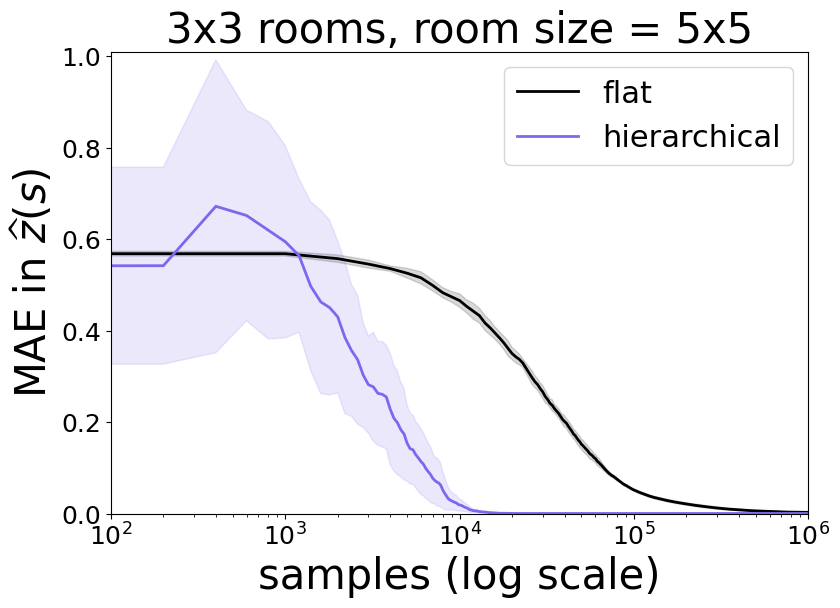

In [12]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# FLAT
df_flat = pd.read_csv(os.path.join(results_dir, "NRoom-v1-log-flat-train:MAE_z.csv"))
flat_mean = df_flat.iloc[:, 1:].mean(axis=1)
flat_std = df_flat.iloc[:, 1:].std(axis=1)
steps = df_flat.step

# LOG HIERARCHICAL
df_h = pd.read_csv(os.path.join(results_dir, "NRoom-v1-log-hierarchical-train:MAE_exit_states-k1.csv"))
h_mean = df_h.iloc[:, 1:].mean(axis=1)
h_std = df_h.iloc[:, 1:].std(axis=1)
stepsh = df_h.step

# EXP HIERARCHICAL
df_he = pd.read_csv(os.path.join(results_dir, "NRoom-v1-exp-hierarchical-train:MAE_exit_states-k1.csv"))
he_mean = df_he.iloc[:, 1:].mean(axis=1)
he_std = df_he.iloc[:, 1:].std(axis=1)
stepshe = df_he.step


fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'3x3 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, flat_mean, linewidth=2, color='black', label='flat')
ax.fill_between(steps, flat_mean-flat_std, flat_mean+flat_std, color='black', alpha=alpha)
# VERSION 2
ax.plot(stepsh, h_mean , linewidth=2, color='mediumslateblue', label="hierarchical")# label='log-h')
ax.fill_between(stepsh, h_mean-h_std, h_mean+h_std, color='mediumslateblue', alpha=alpha)
# VERSION 3
# ax.plot(stepshe, he_mean , linewidth=2, color='firebrick', label='exp-h')
# ax.fill_between(stepshe, he_mean-he_std, he_mean+he_std, color='firebrick', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\widehat z(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_3_3_ECAI.pdf', bbox_inches='tight', dpi=500)
plt.show()

## MAE Subtasks - Learning Curves

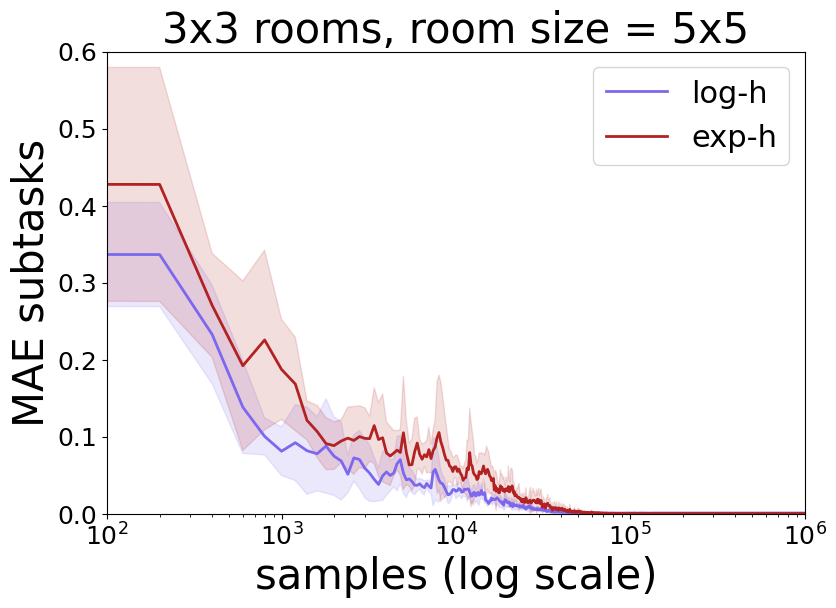

In [4]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# Log Domain
df_log = pd.read_csv(os.path.join(results_dir, "NRoom-v1-log-hierarchical-train:MAE_subtasks.csv"))
log_mean = df_log.iloc[:, 1:].mean(axis=1)
log_std = df_log.iloc[:, 1:].std(axis=1)
steps = df_log.step

# HIERARCHICAL
df_exp = pd.read_csv(os.path.join(results_dir, "NRoom-v1-exp-hierarchical-train:MAE_subtasks.csv"))
exp_mean = df_exp.iloc[:, 1:].mean(axis=1)
exp_std = df_exp.iloc[:, 1:].std(axis=1)
stepsh = df_exp.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'3x3 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, log_mean, linewidth=2, color='mediumslateblue', label='log-h')
ax.fill_between(steps, log_mean-log_std, log_mean+log_std, color='mediumslateblue', alpha=alpha)
# VERSION 2
ax.plot(stepsh, exp_mean , linewidth=2, color='firebrick', label='exp-h')
ax.fill_between(stepsh, exp_mean-exp_std, exp_mean+exp_std, color='firebrick', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 0.6))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE subtasks', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_3_3_subtasks.pdf', bbox_inches='tight', dpi=500)
plt.show()

## MAE Gamma - Stability Curves


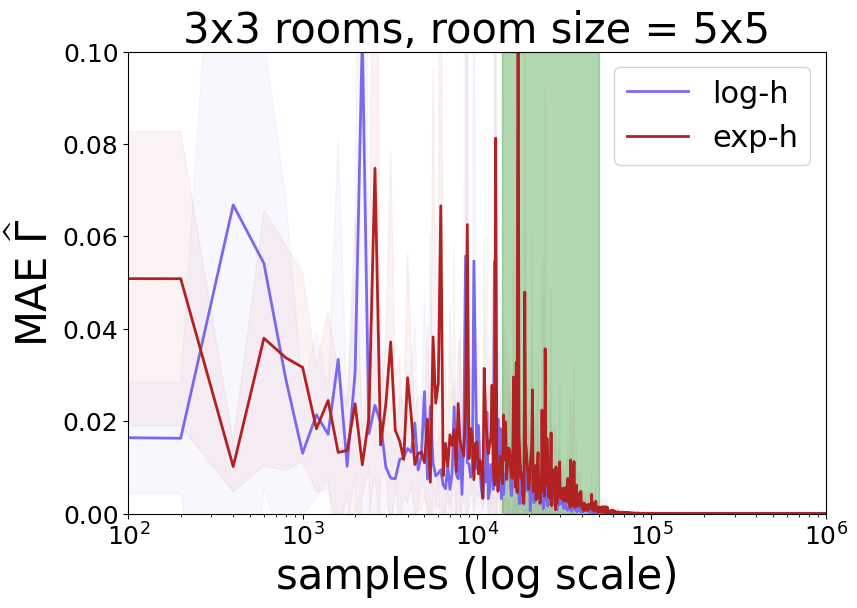

In [5]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# Log Domain
df_log = pd.read_csv(os.path.join(results_dir, "NRoom-v1-log-hierarchical-train:Error_Gamma.csv"))
log_mean = df_log.iloc[:, 1:].mean(axis=1)
log_std = df_log.iloc[:, 1:].std(axis=1)
steps = df_log.step

# HIERARCHICAL
df_exp = pd.read_csv(os.path.join(results_dir, "NRoom-v1-exp-hierarchical-train:Error_Gamma.csv"))
exp_mean = df_exp.iloc[:, 1:].mean(axis=1)
exp_std = df_exp.iloc[:, 1:].std(axis=1)
stepsh = df_exp.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'3x3 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, log_mean, linewidth=2, color='mediumslateblue', label='log-h')
ax.fill_between(steps, log_mean-log_std, log_mean+log_std, color='mediumslateblue', alpha=0.05)
# VERSION 2
ax.plot(stepsh, exp_mean , linewidth=2, color='firebrick', label='exp-h')
ax.fill_between(stepsh, exp_mean-exp_std, exp_mean+exp_std, color='firebrick', alpha=0.05)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 0.1))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE $\widehat\Gamma$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_3_3_gammas.pdf', bbox_inches='tight', dpi=500)
plt.show()

# NRoom-v2

## MAE Exit States - Learning Curves

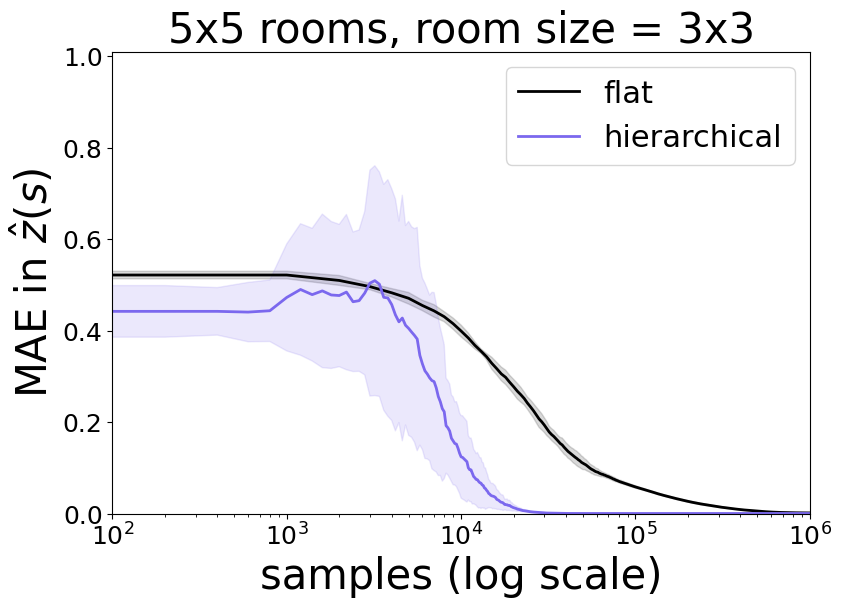

In [14]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# FLAT
df_flat = pd.read_csv(os.path.join(results_dir, "NRoom-v2-log-flat-train:MAE_z.csv"))
flat_mean = df_flat.iloc[:, 1:].mean(axis=1)
flat_std = df_flat.iloc[:, 1:].std(axis=1)
steps = df_flat.step

# LOG HIERARCHICAL
df_h = pd.read_csv(os.path.join(results_dir, "NRoom-v2-log-hierarchical-train:MAE_exit_states-k1.csv"))
h_mean = df_h.iloc[:, 1:].mean(axis=1)
h_std = df_h.iloc[:, 1:].std(axis=1)
stepsh = df_h.step

# EXP HIERARCHICAL
df_he = pd.read_csv(os.path.join(results_dir, "NRoom-v2-exp-hierarchical-train:MAE_exit_states-k1.csv"))
he_mean = df_he.iloc[:, 1:].mean(axis=1)
he_std = df_he.iloc[:, 1:].std(axis=1)
stepshe = df_he.step



fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'5x5 rooms, room size = 3x3', **csfont)

# VERSION 1
ax.plot(steps, flat_mean, linewidth=2, color='black', label='flat')
ax.fill_between(steps, flat_mean-flat_std, flat_mean+flat_std, color='black', alpha=alpha)
# VERSION 2
ax.plot(stepsh, h_mean , linewidth=2, color='mediumslateblue', label="hierarchical") #label='log-h')
ax.fill_between(stepsh, h_mean-h_std, h_mean+h_std, color='mediumslateblue', alpha=alpha)
# VERSION 3
# ax.plot(stepshe, he_mean , linewidth=2, color='firebrick', label='exp-h')
# ax.fill_between(stepshe, he_mean-he_std, he_mean+he_std, color='firebrick', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

legend = ['$V_1$']

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat z(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_5_5_ECAI.pdf', bbox_inches='tight', dpi=500)
plt.show()

## MAE Subtask - Learning Curves

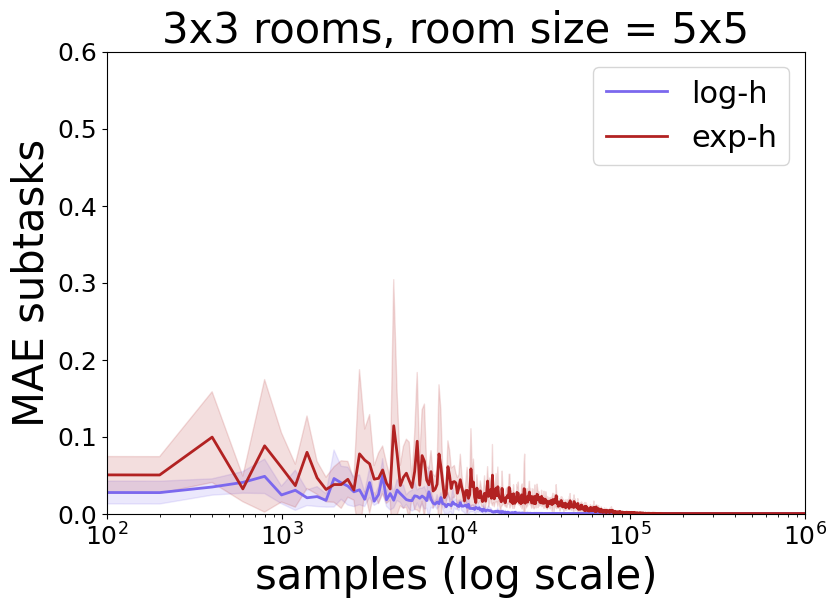

In [35]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# Log Domain
df_log = pd.read_csv(os.path.join(results_dir, "NRoom-v2-log-hierarchical-train:MAE_subtasks.csv"))
log_mean = df_log.iloc[:, 1:].mean(axis=1)
log_std = df_log.iloc[:, 1:].std(axis=1)
steps = df_log.step

# HIERARCHICAL
df_exp = pd.read_csv(os.path.join(results_dir, "NRoom-v2-exp-hierarchical-train:MAE_subtasks.csv"))
exp_mean = df_exp.iloc[:, 1:].mean(axis=1)
exp_std = df_exp.iloc[:, 1:].std(axis=1)
stepsh = df_exp.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'3x3 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, log_mean, linewidth=2, color='mediumslateblue', label='log-h')
ax.fill_between(steps, log_mean-log_std, log_mean+log_std, color='mediumslateblue', alpha=alpha)
# VERSION 2
ax.plot(stepsh, exp_mean , linewidth=2, color='firebrick', label='exp-h')
ax.fill_between(stepsh, exp_mean-exp_std, exp_mean+exp_std, color='firebrick', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 0.6))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE subtasks', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_5_5_subtasks.pdf', bbox_inches='tight', dpi=500)
plt.show()

## MAE Gamma - Stability Curves

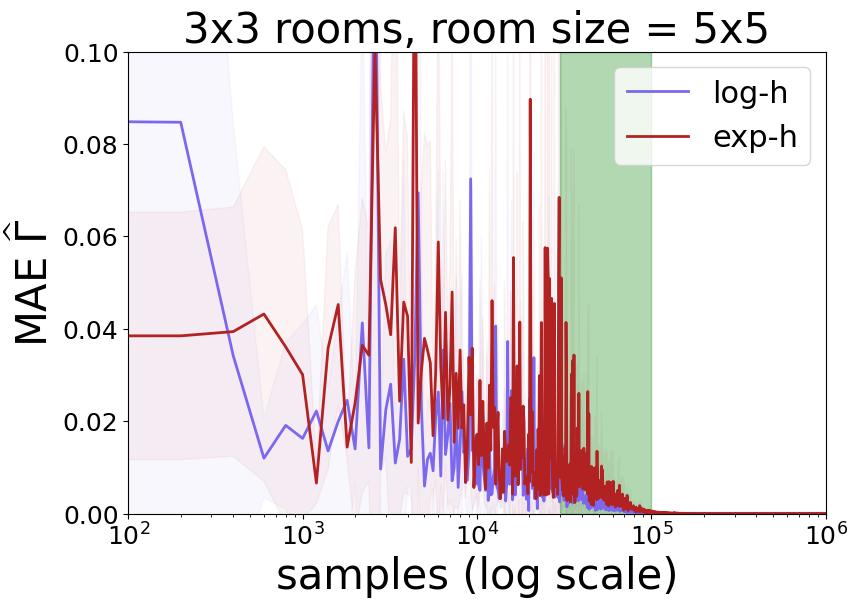

In [7]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# Log Domain
df_log = pd.read_csv(os.path.join(results_dir, "NRoom-v2-log-hierarchical-train:Error_Gamma.csv"))
log_mean = df_log.iloc[:, 1:].mean(axis=1)
log_std = df_log.iloc[:, 1:].std(axis=1)
steps = df_log.step

# HIERARCHICAL
df_exp = pd.read_csv(os.path.join(results_dir, "NRoom-v2-exp-hierarchical-train:Error_Gamma.csv"))
exp_mean = df_exp.iloc[:, 1:].mean(axis=1)
exp_std = df_exp.iloc[:, 1:].std(axis=1)
stepsh = df_exp.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'3x3 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, log_mean, linewidth=2, color='mediumslateblue', label='log-h')
ax.fill_between(steps, log_mean-log_std, log_mean+log_std, color='mediumslateblue', alpha=0.05)
# VERSION 2
ax.plot(stepsh, exp_mean , linewidth=2, color='firebrick', label='exp-h')
ax.fill_between(stepsh, exp_mean-exp_std, exp_mean+exp_std, color='firebrick', alpha=0.05)

ax.fill_between([30000, 1e5], [0.1, 0.1], color='green', alpha=0.3)


plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 0.1))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE $\widehat\Gamma$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_5_5_gammas.pdf', bbox_inches='tight', dpi=500)
plt.show()

# NRoom-v3

## MAE Exit States - Learning Curves

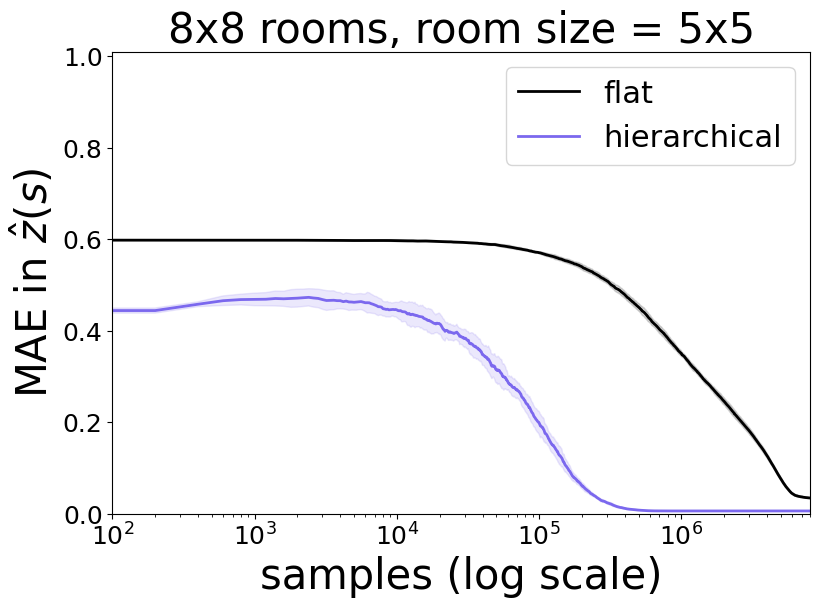

In [18]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# FLAT
df_flat = pd.read_csv(os.path.join(results_dir, "NRoom-v3-log-flat-train:MAE_z.csv"))
flat_mean = df_flat.iloc[:, 1:].mean(axis=1)
flat_std = df_flat.iloc[:, 1:].std(axis=1)
steps = df_flat.step.to_numpy()

# LOG H
df_h = pd.read_csv(os.path.join(results_dir, "NRoom-v3-log-hierarchical-train:MAE_exit_states-k1.csv"))
h_mean = df_h.iloc[:, 1:].to_numpy().mean(axis=1)
h_std = df_h.iloc[:, 1:].to_numpy().std(axis=1)
stepsh = df_h.step.to_numpy()

# LOG EXP
df_he = pd.read_csv(os.path.join(results_dir, "NRoom-v3-exp-hierarchical-train:MAE_exit_states.csv"))
he_mean = df_he.iloc[:, 1:].mean(axis=1)
he_std = df_he.iloc[:, 1:].std(axis=1)
stepshe = df_he.step


stepsh = np.append(stepsh, steps[-1])
h_mean = np.append(h_mean, h_mean[-1])
h_std = np.append(h_std, h_std[-1])

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'8x8 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, flat_mean, linewidth=2, color='black', label='flat')
ax.fill_between(steps, flat_mean-flat_std, flat_mean+flat_std, color='black', alpha=alpha)
# VERSION 2
ax.plot(stepsh, h_mean , linewidth=2, color='mediumslateblue', label='hierarchical')#label='log-h')
ax.fill_between(stepsh, h_mean-h_std, h_mean+h_std, color='mediumslateblue', alpha=alpha)
# # EXP HIERARCHICAL
# ax.plot(stepshe, he_mean , linewidth=2, color='firebrick', label='exp-h')
# ax.fill_between(stepshe, he_mean-he_std, he_mean+he_std, color='firebrick', alpha=alpha)


plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

legend = ['$V_1$']

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e2, 8e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat z(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_8_8_ECAI.pdf', bbox_inches='tight', dpi=500)
plt.show()

## MAE Subtasks - Learning Curves

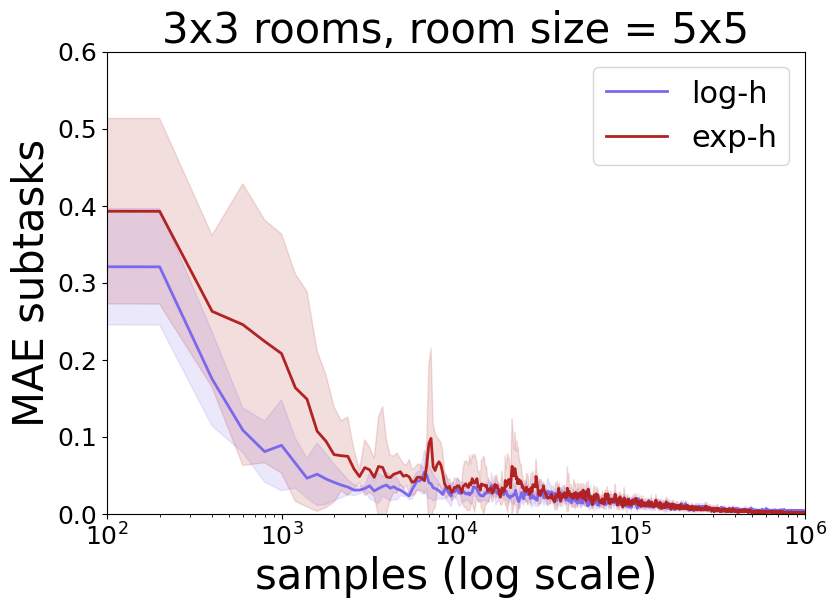

In [9]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# Log Domain
df_log = pd.read_csv(os.path.join(results_dir, "NRoom-v3-log-hierarchical-train:MAE_subtasks.csv"))
log_mean = df_log.iloc[:, 1:].mean(axis=1)
log_std = df_log.iloc[:, 1:].std(axis=1)
steps = df_log.step

# HIERARCHICAL
df_exp = pd.read_csv(os.path.join(results_dir, "NRoom-v3-exp-hierarchical-train:MAE_subtasks.csv"))
exp_mean = df_exp.iloc[:, 1:].mean(axis=1)
exp_std = df_exp.iloc[:, 1:].std(axis=1)
stepsh = df_exp.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'3x3 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, log_mean, linewidth=2, color='mediumslateblue', label='log-h')
ax.fill_between(steps, log_mean-log_std, log_mean+log_std, color='mediumslateblue', alpha=alpha)
# VERSION 2
ax.plot(stepsh, exp_mean , linewidth=2, color='firebrick', label='exp-h')
ax.fill_between(stepsh, exp_mean-exp_std, exp_mean+exp_std, color='firebrick', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 0.6))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE subtasks', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_8_8_subtasks.pdf', bbox_inches='tight', dpi=500)
plt.show()

## MAE Gamma - Stability Curves

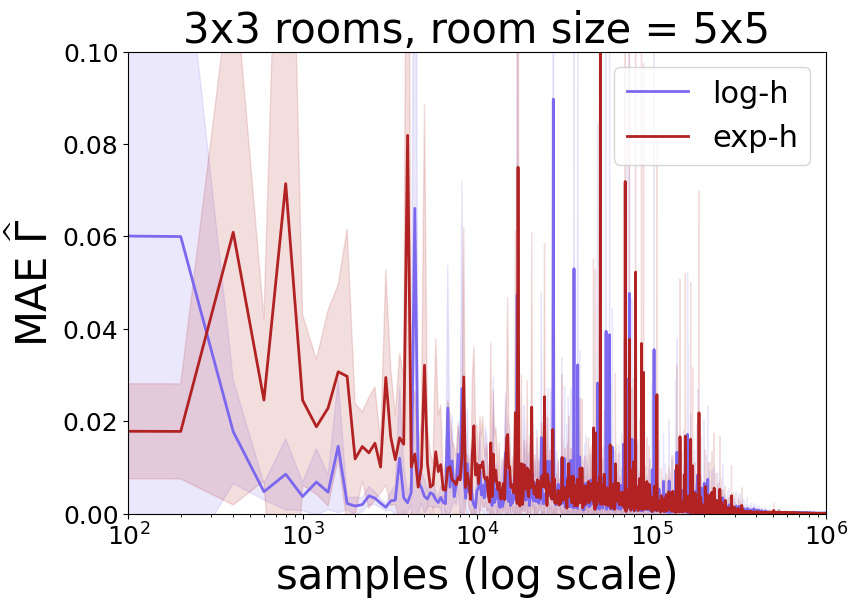

In [46]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# Log Domain
df_log = pd.read_csv(os.path.join(results_dir, "NRoom-v3-log-hierarchical-train:Error_Gamma.csv"))
log_mean = df_log.iloc[:, 1:].mean(axis=1)
log_std = df_log.iloc[:, 1:].std(axis=1)
steps = df_log.step

# HIERARCHICAL
df_exp = pd.read_csv(os.path.join(results_dir, "NRoom-v3-exp-hierarchical-train:Error_Gamma.csv"))
exp_mean = df_exp.iloc[:, 1:].mean(axis=1)
exp_std = df_exp.iloc[:, 1:].std(axis=1)
stepsh = df_exp.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'3x3 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, log_mean, linewidth=2, color='mediumslateblue', label='log-h')
ax.fill_between(steps, log_mean-log_std, log_mean+log_std, color='mediumslateblue', alpha=alpha)
# VERSION 2
ax.plot(stepsh, exp_mean , linewidth=2, color='firebrick', label='exp-h')
ax.fill_between(stepsh, exp_mean-exp_std, exp_mean+exp_std, color='firebrick', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 0.1))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE $\widehat\Gamma$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_8_8_gammas.pdf', bbox_inches='tight', dpi=500)
plt.show()

# Taxi-v1

## MAE Exit States - Learning Curves

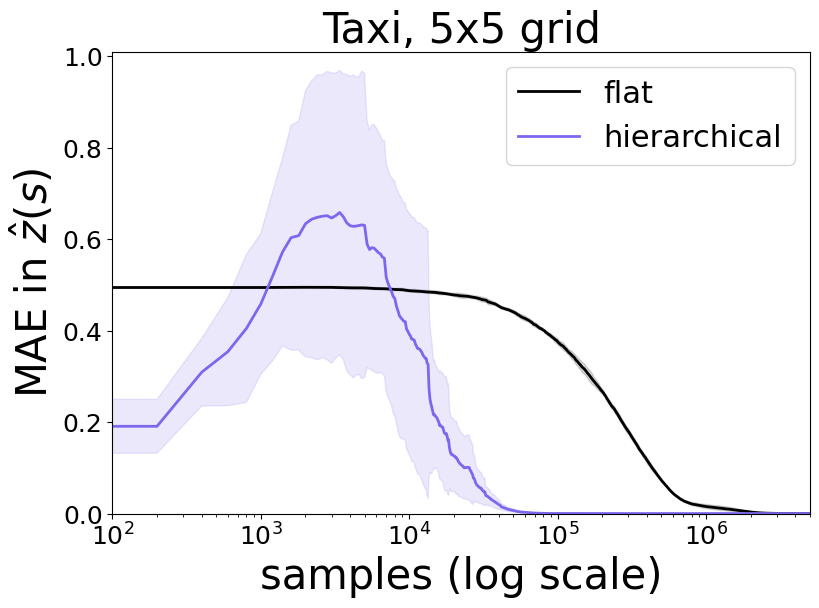

In [21]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# FLAT
df_flat = pd.read_csv(os.path.join(results_dir, "Taxi-v1-log-flat-train:MAE_z.csv"))
flat_mean = df_flat.iloc[:, 1:].mean(axis=1)
flat_std = df_flat.iloc[:, 1:].std(axis=1)
steps = df_flat.step.to_numpy()

# LOG H
df_h = pd.read_csv(os.path.join(results_dir, "Taxi-v1-log-hierarchical-train:MAE_exit_states.csv"))
h_mean = df_h.iloc[:, 1:].to_numpy().mean(axis=1)
h_std = df_h.iloc[:, 1:].to_numpy().std(axis=1)
stepsh = df_h.step.to_numpy()

# LOG EXP
df_he = pd.read_csv(os.path.join(results_dir, "Taxi-v1-exp-hierarchical-train:MAE_exit_states.csv"))
he_mean = df_he.iloc[:, 1:].mean(axis=1)
he_std = df_he.iloc[:, 1:].std(axis=1)
stepshe = df_he.step


stepsh = np.append(stepsh, steps[-1])
h_mean = np.append(h_mean, h_mean[-1])
h_std = np.append(h_std, h_std[-1])

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'Taxi, 5x5 grid', **csfont)

# VERSION 1
ax.plot(steps, flat_mean, linewidth=2, color='black', label='flat')
ax.fill_between(steps, flat_mean-flat_std, flat_mean+flat_std, color='black', alpha=alpha)
# VERSION 2
ax.plot(stepsh, h_mean , linewidth=2, color='mediumslateblue', label="hierarchical")#label='log-h')
ax.fill_between(stepsh, h_mean-h_std, h_mean+h_std, color='mediumslateblue', alpha=alpha)
# EXP HIERARCHICAL
# ax.plot(stepshe, he_mean , linewidth=2, color='firebrick', label='exp-h')
# ax.fill_between(stepshe, he_mean-he_std, he_mean+he_std, color='firebrick', alpha=alpha)


plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e2, 5e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat z(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/taxi_5_ECAI.pdf', bbox_inches='tight', dpi=500)
plt.show()

## MAE Subtasks - Learning Curves

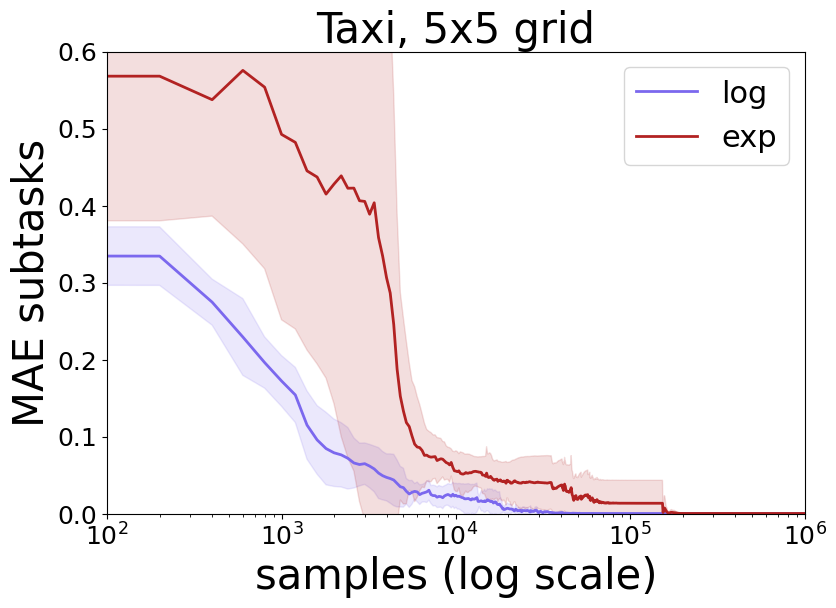

In [19]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# Log Domain
df_log = pd.read_csv(os.path.join(results_dir, "Taxi-v1-log-hierarchical-train:MAE_subtasks.csv"))
log_mean = df_log.iloc[:, 1:].mean(axis=1)
log_std = df_log.iloc[:, 1:].std(axis=1)
steps = df_log.step

# HIERARCHICAL
df_exp = pd.read_csv(os.path.join(results_dir, "Taxi-v1-exp-hierarchical-train:MAE_subtasks.csv"))
exp_mean = df_exp.iloc[:, 1:].mean(axis=1)
exp_std = df_exp.iloc[:, 1:].std(axis=1)
stepsh = df_exp.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'Taxi, 5x5 grid', **csfont)

# VERSION 1
ax.plot(steps, log_mean, linewidth=2, color='mediumslateblue', label='log')
ax.fill_between(steps, log_mean-log_std, log_mean+log_std, color='mediumslateblue', alpha=alpha)
# VERSION 2
ax.plot(stepsh, exp_mean , linewidth=2, color='firebrick', label='exp')
ax.fill_between(stepsh, exp_mean-exp_std, exp_mean+exp_std, color='firebrick', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 0.6))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE subtasks', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/taxi_5_subtask.pdf', bbox_inches='tight', dpi=500)
plt.show()

## MAE Error Gamma - Stability Curves

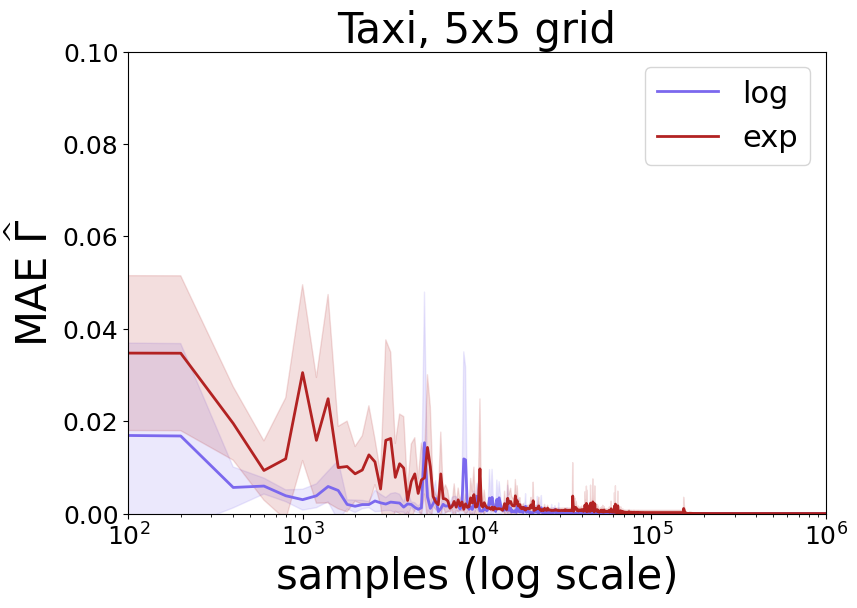

In [20]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# Log Domain
df_log = pd.read_csv(os.path.join(results_dir, "Taxi-v1-log-hierarchical-train:Error_Gamma.csv"))
log_mean = df_log.iloc[:, 1:].mean(axis=1)
log_std = df_log.iloc[:, 1:].std(axis=1)
steps = df_log.step

# HIERARCHICAL
df_exp = pd.read_csv(os.path.join(results_dir, "Taxi-v1-exp-hierarchical-train:Error_Gamma.csv"))
exp_mean = df_exp.iloc[:, 1:].mean(axis=1)
exp_std = df_exp.iloc[:, 1:].std(axis=1)
stepsh = df_exp.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'Taxi, 5x5 grid', **csfont)

# VERSION 1
ax.plot(steps, log_mean, linewidth=2, color='mediumslateblue', label='log')
ax.fill_between(steps, log_mean-log_std, log_mean+log_std, color='mediumslateblue', alpha=alpha)
# VERSION 2
ax.plot(stepsh, exp_mean , linewidth=2, color='firebrick', label='exp')
ax.fill_between(stepsh, exp_mean-exp_std, exp_mean+exp_std, color='firebrick', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 0.1))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE $\widehat\Gamma$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/taxi_5_gammas.pdf', bbox_inches='tight', dpi=500)
plt.show()

# Taxi-v2

## MAE Exit States - Learning Curves

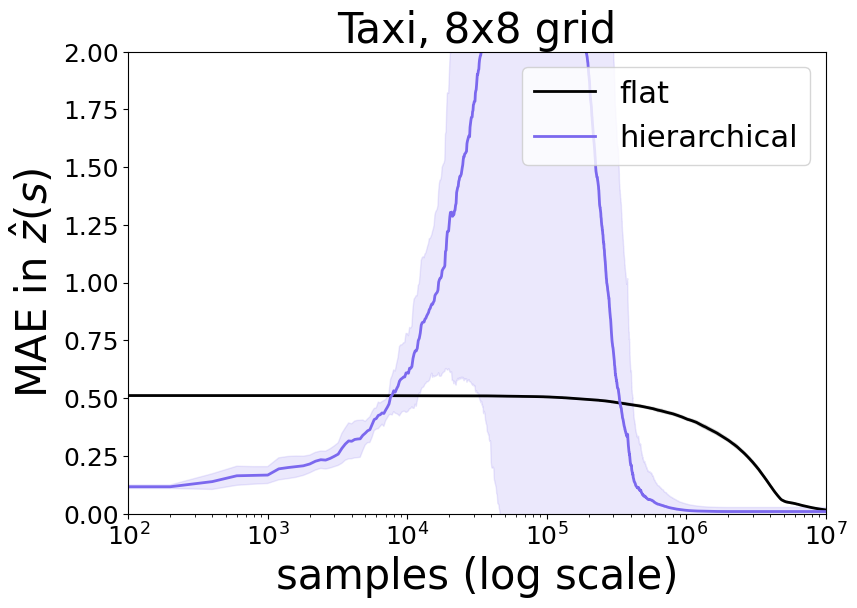

In [36]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# FLAT
df_flat = pd.read_csv(os.path.join(results_dir, "Taxi-v3-log-flat-train:MAE_z.csv"))
flat_mean = df_flat.iloc[:, 1:].mean(axis=1)
flat_std = df_flat.iloc[:, 1:].std(axis=1)
steps = df_flat.step.to_numpy()

# LOG H
df_h = pd.read_csv(os.path.join(results_dir, "Taxi-v3-log-hierarchical-train:MAE_exit_states-k1.csv"))
h_mean = df_h.iloc[:, 1:].to_numpy().mean(axis=1)
h_std = df_h.iloc[:, 1:].to_numpy().std(axis=1)
stepsh = df_h.step.to_numpy()

# LOG EXP
# df_he = pd.read_csv(os.path.join(results_dir, "Taxi-v2-exp-hierarchical-train:MAE_exit_states.csv"))
# he_mean = df_he.iloc[:, 1:].mean(axis=1)
# he_std = df_he.iloc[:, 1:].std(axis=1)
# stepshe = df_he.step


stepsh = np.append(stepsh, steps[-1])
h_mean = np.append(h_mean, h_mean[-1])
h_std = np.append(h_std, h_std[-1])

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'Taxi, 8x8 grid', **csfont)

# VERSION 1
ax.plot(steps, flat_mean, linewidth=2, color='black', label='flat')
ax.fill_between(steps, flat_mean-flat_std, flat_mean+flat_std, color='black', alpha=alpha)
# VERSION 2
ax.plot(stepsh, h_mean , linewidth=2, color='mediumslateblue', label="hierarchical")#label='log-h')
ax.fill_between(stepsh, h_mean-h_std, h_mean+h_std, color='mediumslateblue', alpha=alpha)
# EXP HIERARCHICAL
# ax.plot(stepshe, he_mean , linewidth=2, color='firebrick', label='exp-h')
# ax.fill_between(stepshe, he_mean-he_std, he_mean+he_std, color='firebrick', alpha=alpha)


plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 2))
ax.set_xscale("log")
ax.set_xlim((1e2, 10e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat z(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/taxi_8_ECAI.pdf', bbox_inches='tight', dpi=500)
plt.show()

## MAE Subtasks - Learning Curves

In [22]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# Log Domain
df_log = pd.read_csv(os.path.join(results_dir, "Taxi-v3-log-hierarchical-train:MAE_subtasks.csv"))
log_mean = df_log.iloc[:, 1:].mean(axis=1)
log_std = df_log.iloc[:, 1:].std(axis=1)
steps = df_log.step

# HIERARCHICAL
df_exp = pd.read_csv(os.path.join(results_dir, "Taxi-v3-exp-hierarchical-train:MAE_subtasks.csv"))
exp_mean = df_exp.iloc[:, 1:].mean(axis=1)
exp_std = df_exp.iloc[:, 1:].std(axis=1)
stepsh = df_exp.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'3x3 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, log_mean, linewidth=2, color='mediumslateblue', label='log')
ax.fill_between(steps, log_mean-log_std, log_mean+log_std, color='mediumslateblue', alpha=alpha)
# VERSION 2
ax.plot(stepsh, exp_mean , linewidth=2, color='firebrick', label='exp')
ax.fill_between(stepsh, exp_mean-exp_std, exp_mean+exp_std, color='firebrick', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 0.6))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\widehat z(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

# plt.savefig('../results/pictures/nrooms_3_3.pdf', bbox_inches='tight', dpi=500)
plt.show()

EmptyDataError: No columns to parse from file

## MAE Error Gamma - Stability Curves